# Task 1

Let G = ({1, 2, 3, 4, 5, 6, 7, 8, 9, 10}, {1 → 2, 2 → 1, 2 → 3, 2 → 2, 3 → 4, 3 → 2, 4 →
2, 4 → 4, 4 → 5, 4 → 1, 1 → 5, 9 → 10, 8 → 7, 7 → 8, 4 → 9, 10 → 7, 8 → 1}). An
agent is placed at in a vertex 1. In each step the agent chooses randomly out-going
edge and goes to the vertex pointed by this edge. Find the distribution of the position
of the agent after 2, 3, 4, 50 and 100 steps. HINT: Do this numerically. Remember that
$p^{(t+1)} = p^{(t)}P$

In [1]:
import numpy as np
import numba
from numba.typed import Dict
from numba.core import types
from matplotlib import pyplot as plt
from time import time

In [2]:
@numba.njit()
def random_walk(graph, initial_node, steps):
    current_node = initial_node
    walk = np.zeros(steps, dtype=numba.int16)
    nodes = list(graph.keys())
    for _ in range(steps):
        choice = np.random.choice(graph[current_node])
        if choice != -1:
            current_node = choice
    return current_node 

In [3]:
G = {
    1: [2, 5],
    2: [1, 2, 3],
    3: [4, 2],
    4: [2, 4, 5, 1, 9],
    5: [-1],
    6: [-1],
    7: [8],
    8: [7, 1],
    9: [10],
    10: [7]
}
G_numba = Dict.empty(key_type=types.int16, value_type=types.int32[:])
for key, value in G.items():
    print(key, value)
    G_numba[key] = np.array(value)

1 [2, 5]
2 [1, 2, 3]
3 [4, 2]
4 [2, 4, 5, 1, 9]
5 [-1]
6 [-1]
7 [8]
8 [7, 1]
9 [10]
10 [7]


C:\Users\thejg\Desktop\Programming\projects39\lib\site-packages\numba\typed\typeddict.py:34: NumbaTypeSafetyWarning: unsafe cast from int64 to int16. Precision may be lost.
  d[key] = value


In [4]:
steps = 100
print(random_walk(G_numba, 1, steps))

5


In [5]:
%%timeit
random_walk(G_numba, 1, steps)

4.91 µs ± 18.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [6]:
@numba.njit()
def repeat_random_walk(G, initial_node, steps, trials):
    results = np.zeros(trials, dtype=types.int16)
    for index in range(trials):
        results[index] = random_walk(G, initial_node, steps)
    return results

In [7]:
trials = 100
print(repeat_random_walk(G_numba, 1, steps, trials))

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


In [8]:
%%timeit
repeat_random_walk(G_numba, 1, steps, trials)

349 µs ± 2.65 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [9]:
trials = 1000000
starting_index = 1
steps_range = [2, 3, 4, 50, 100]
results = []
times = []
bins = len(G)

In [10]:
for step in steps_range:
    start_time = time()
    results.append(repeat_random_walk(G_numba, starting_index, step, trials))
    stop_time = time()
    times.append(stop_time - start_time)

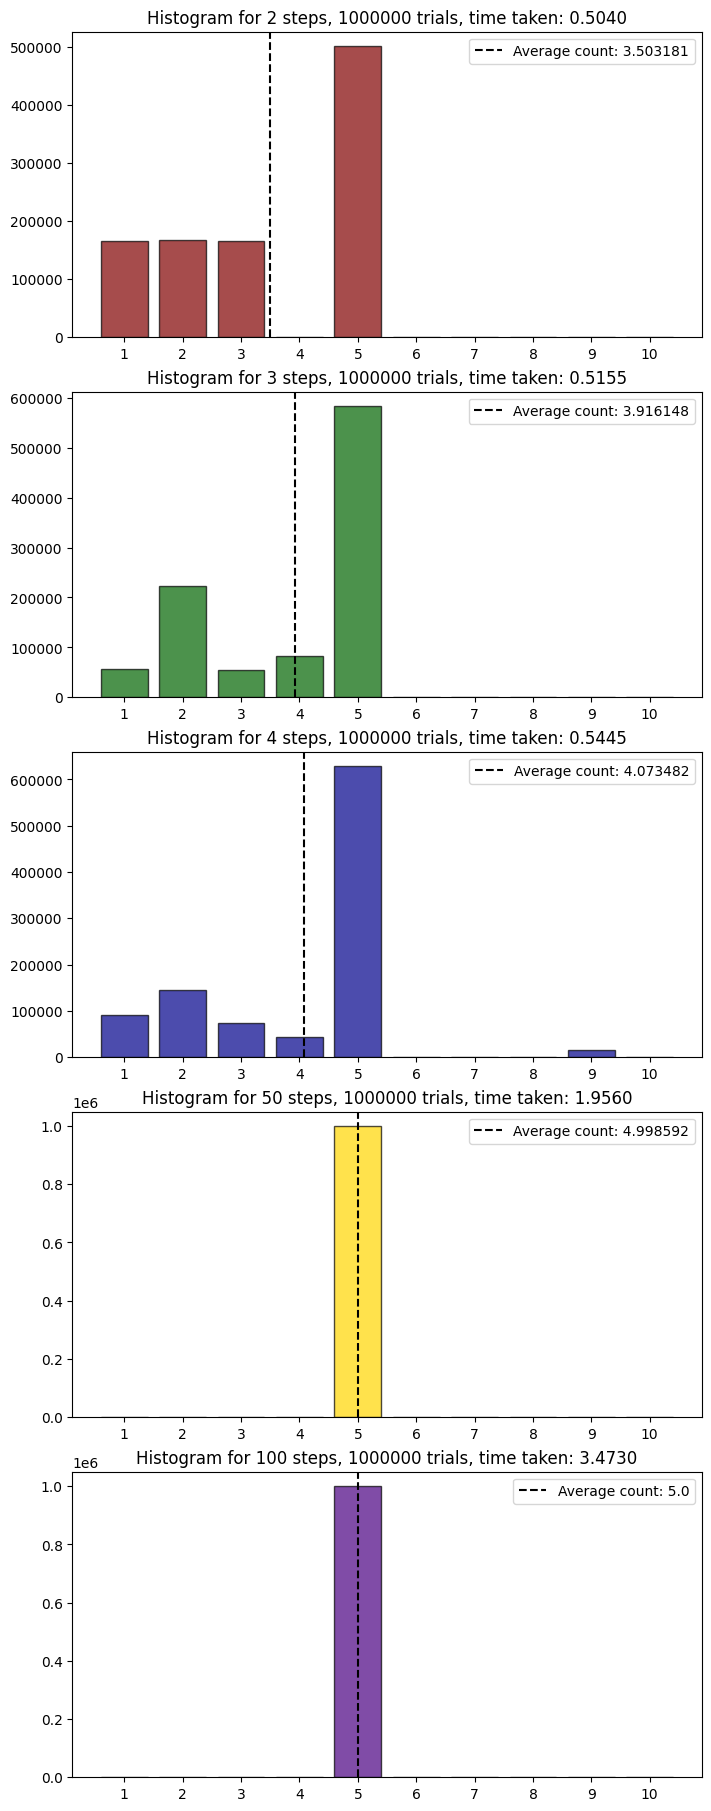

In [11]:
figure1, axes1 = plt.subplots(len(steps_range), 1, layout='constrained', figsize=(7, 18))
colors = ['maroon', 'darkgreen', 'darkblue', 'gold', 'indigo']

for index, (step, histogram, time_, color) in enumerate(zip(steps_range, results, times, colors)):
    mean_value = histogram.mean()
    axes1[index].hist(histogram,
                      color=color,
                      alpha=0.7,
                      bins=bins,
                      align='mid',
                      ec='black',
                      rwidth=0.8,
                      range=(0.5, len(G) + 0.5))
    axes1[index].axvline(mean_value,
                         color='black',
                         linestyle='--',
                         label=f'Average count: {mean_value}')
    title = f'Histogram for {step} steps, {trials} trials, time taken: {time_:.4f}'
    axes1[index].set(title=title, xticks=list(G.keys()))
    axes1[index].legend()

Graph becomes much more interesting when we remove option 5 from node 1

In [12]:
G = {
    1: [2], # changed from [2, 5]
    2: [1, 2, 3],
    3: [4, 2],
    4: [2, 4, 5, 1, 9],
    5: [-1],
    6: [-1],
    7: [8],
    8: [7, 1],
    9: [10],
    10: [7]
}
G_numba = Dict.empty(key_type=types.int16, value_type=types.int32[:])
for key, value in G.items():
    print(key, value)
    G_numba[key] = np.array(value)

trials = 1000000
starting_index = 1
steps_range = [2, 3, 4, 50, 100]
results = []
times = []
bins = len(G)

for step in steps_range:
    start_time = time()
    results.append(repeat_random_walk(G_numba, starting_index, step, trials))
    stop_time = time()
    times.append(stop_time - start_time)

1 [2]
2 [1, 2, 3]
3 [4, 2]
4 [2, 4, 5, 1, 9]
5 [-1]
6 [-1]
7 [8]
8 [7, 1]
9 [10]
10 [7]


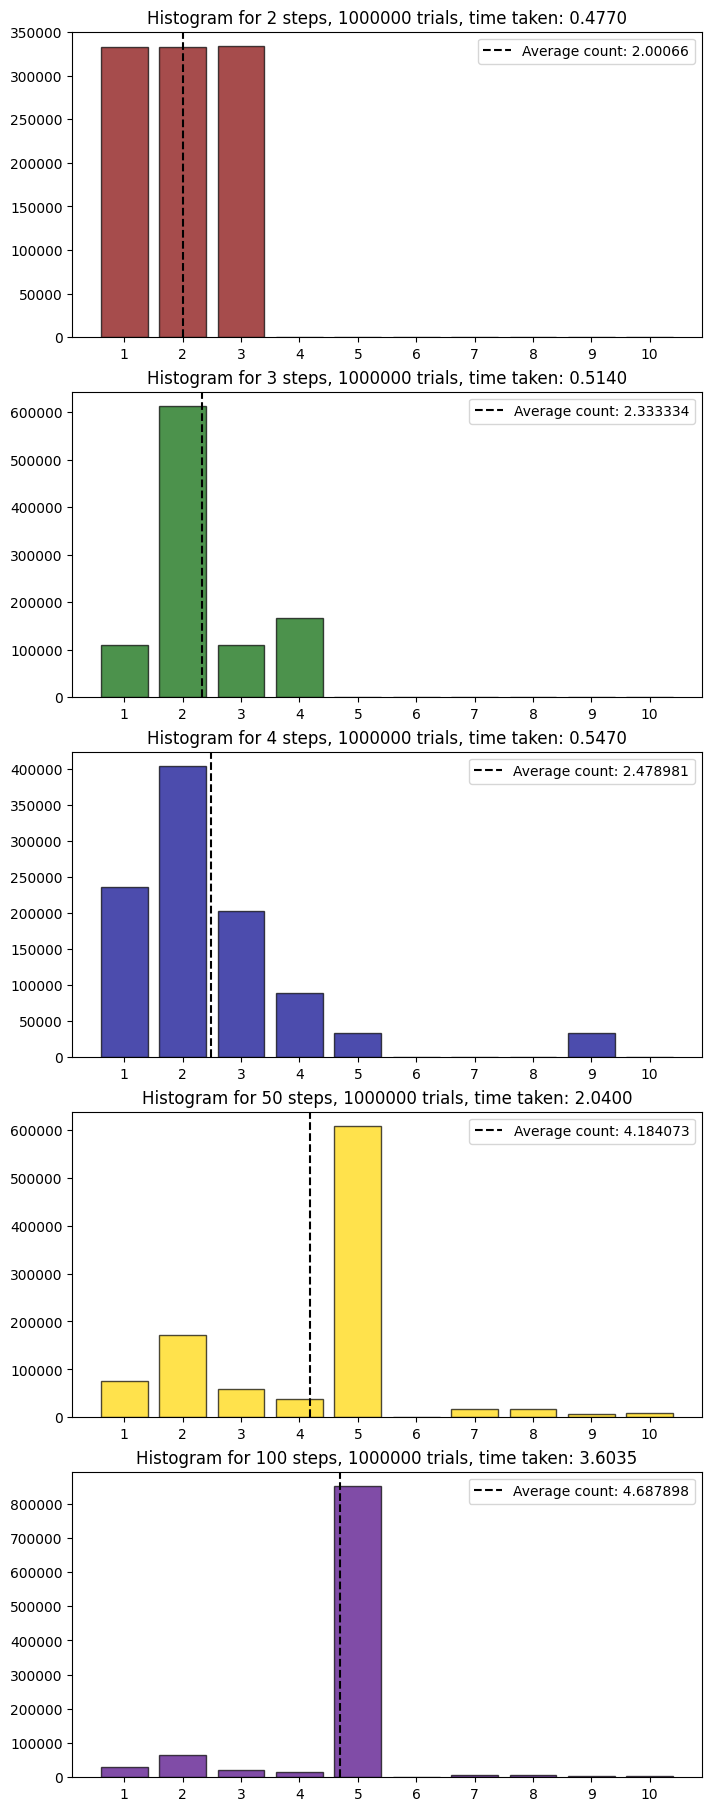

In [13]:
figure1, axes1 = plt.subplots(len(steps_range), 1, layout='constrained', figsize=(7, 18))

for index, (step, histogram, time_, color) in enumerate(zip(steps_range, results, times, colors)):
    mean_value = histogram.mean()
    axes1[index].hist(histogram,
                      color=color,
                      alpha=0.7,
                      bins=bins,
                      align='mid',
                      ec='black',
                      rwidth=0.8,
                      range=(0.5, len(G) + 0.5))
    axes1[index].axvline(mean_value,
                         color='black',
                         linestyle='--',
                         label=f'Average count: {mean_value}')
    title = f'Histogram for {step} steps, {trials} trials, time taken: {time_:.4f}'
    axes1[index].set(title=title, xticks=list(G.keys()))
    axes1[index].legend()